In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset= pd.read_csv("D:\TP DEH ABOUBACAR\STAGE_SEJEN\MACHINE LEARNING\carPurchase.csv")
print(dataset)

x=dataset.iloc[:, 2:4].values #Prends toutes les colonnes sauf la derniere et affecte x toutes les colonnes sauf la derniere
y=dataset.iloc[:,-1].values # Affiche la derniere colonne et affecte à y la derniere colone
print(x)
print(y)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
5    15728773    Male   27            58000          0
6    15598044  Female   27            84000          0
7    15694829  Female   32           150000          1
8    15600575    Male   25            33000          0
9    15727311  Female   35            65000          0
10   15570769  Female   26            80000          0
11   15606274  Female   26            52000          0
12   15746139    Male   20            86000          0
13   15704987    Male   32            18000          0
14   15628972    Male   18            82000          0
15   15697686    Male   29            80000          0
16   15733883    Male   47            25000          1
17   15617

In [2]:
#Scinder le jeu de données d'apprentissage et données test
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0) #y la variable à expliquer, test_size est la proportion des personnes à attribuer au test
from sklearn.preprocessing import StandardScaler  
sc_x =StandardScaler() #StandarScaler pour centrer reduit et pour l'autre c'est min_maxScaler
x_train=sc_x.fit_transform(x_train)
x_test =sc_x.transform(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [4]:
#Ajuster le Classifieur sur la donnée d’apprentissage. Crée un objet pour le
#classifieur et appelé le classifierObj
from sklearn.svm import SVC
classifierObj = SVC() 
classifierObj.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


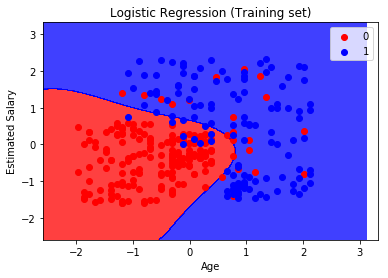

In [5]:
#Visualisation des données d'apprentissage
from matplotlib.colors import ListedColormap
x_set, y_set=x_train,y_train
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1, stop=x_set[:,0].max()+1,step=0.01),np.arange(start=x_set[:,1].min()-1, stop=x_set[:,1].max()+1,step=0.01))
#start =x_set[:,0].min() donne les limites des axes , et on fait -+1 pour augmenter les marges
plt.contourf(x1,x2,classifierObj.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape), alpha=0.75, cmap=ListedColormap(('red','blue')))
#plt.contourf deninie la ligne de decision pour pouvoir faire la difference entre les differentes zone
plt.xlim(x1.min(),x1.max())
plt.xlim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],c=ListedColormap(('red','blue'))(i),label=j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [15]:
#Ajuster le Classifieur sur la donnée d’apprentissage. Crée un objet
#pour le classifieur et appelé le classifierObj
from sklearn.svm import SVC
classifierObj1 = SVC(kernel='poly', degree=3)
classifierObj1.fit(x_train, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


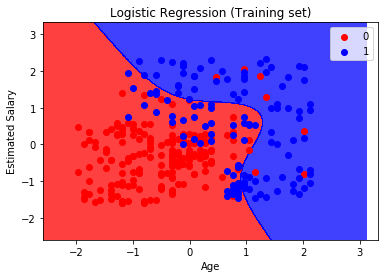

In [16]:
#Visualisation des données d'apprentissage
from matplotlib.colors import ListedColormap
x_set, y_set=x_train,y_train
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1, stop=x_set[:,0].max()+1,step=0.01),np.arange(start=x_set[:,1].min()-1, stop=x_set[:,1].max()+1,step=0.01))
#start =x_set[:,0].min() donne les limites des axes , et on fait -+1 pour augmenter les marges
plt.contourf(x1,x2,classifierObj1.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape), alpha=0.75, cmap=ListedColormap(('red','blue')))
#plt.contourf deninie la ligne de decision pour pouvoir faire la difference entre les differentes zone
plt.xlim(x1.min(),x1.max())
plt.xlim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],c=ListedColormap(('red','blue'))(i),label=j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [11]:
#Essayez le noyau sigmoïde et voyez les résultats
#Ajuster le Classifieur sur la donnée d’apprentissage. Crée un objet
#pour le classifieur et appelé le classifierObj
from sklearn.svm import SVC
classifierObj2 = SVC(kernel='sigmoid')
classifierObj2.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


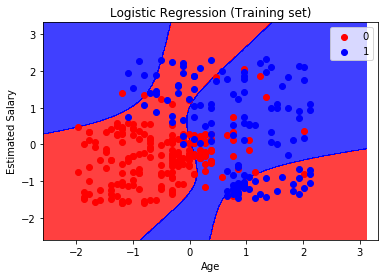

In [12]:
#Visualisation des données d'apprentissage
from matplotlib.colors import ListedColormap
x_set, y_set=x_train,y_train
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1, stop=x_set[:,0].max()+1,step=0.01),np.arange(start=x_set[:,1].min()-1, stop=x_set[:,1].max()+1,step=0.01))
#start =x_set[:,0].min() donne les limites des axes , et on fait -+1 pour augmenter les marges
plt.contourf(x1,x2,classifierObj2.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape), alpha=0.75, cmap=ListedColormap(('red','blue')))
#plt.contourf deninie la ligne de decision pour pouvoir faire la difference entre les differentes zone
plt.xlim(x1.min(),x1.max())
plt.xlim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],c=ListedColormap(('red','blue'))(i),label=j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [17]:
from sklearn.metrics import confusion_matrix
#Prediction sur la donnée test
y_pred=classifierObj.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[55  3]
 [ 1 21]]


In [18]:
from sklearn.metrics import confusion_matrix
#Prediction sur la donnée test
y_pred=classifierObj1.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[58  0]
 [ 7 15]]


In [19]:
from sklearn.metrics import confusion_matrix
#Prediction sur la donnée test
y_pred=classifierObj2.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[50  8]
 [ 8 14]]
